In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Aycha\Desktop\M2_BDIA\NLP\Projet_movie\final\dataset-final - 3000.csv")
df.head()

,Unnamed: 0,MOVIE_NAME,REVIEWS,SYNOPSIS,YEAR,CAST,DURATION_MIN,GENRES,PRODUCERS,RATING_SUR_5,MAJORITY_SENTIMENT,MOST_FREQUENT_SENTIMENT,Rating_Category
0,0,carry-on,['aucune critique disponible'],A cul-de-sac in an oppressive suburb becomes a...,1998.0,"Julia Stiles, William R. Moses, Patrick Muldoo...",88.0,Thriller,Frank Beddor; Greg Steinberg,2.64,['neutral'],neutral,Negative
1,1,nosferatu,"['watched understand spongebob reference', 'ca...",Years after witnessing the death of the revere...,2024.0,"Paul Mescal, Denzel Washington, Pedro Pascal, ...",148.0,Drama; Action; Adventure,Michael A. Pruss; Winston Azzopardi; David Fra...,3.37,"['neutral', 'negative', 'positive', 'negative'...",positive,Neutral
2,2,home-alone,"['young patrick bateman', 'think wet bandit ev...",After receiving an unexpected call from her wa...,2024.0,"Auliʻi Cravalho, Dwayne Johnson, Hualālai Chun...",100.0,Comedy; Animation; Adventure; Family,Christina Chen; Yvett Merino Flores,2.87,"['neutral', 'neutral', 'negative', 'negative',...",neutral,Negative
3,3,the-holdovers,['there handshake feel overwhelmingly warm emo...,A fading celebrity decides to use a black mark...,2024.0,"Demi Moore, Margaret Qualley, Dennis Quaid, Ed...",141.0,Horror; Science Fiction,Coralie Fargeat; Eric Fellner; Tim Bevan,3.85,"['positive', 'negative', 'positive', 'neutral'...",positive,Positive
4,4,anora,"['terrifying tale dating mama boy', 'sean bake...",After discovering their significant others are...,2024.0,"Lindsay Lohan, Ian Harding, Kristin Chenoweth,...",99.0,Drama; Romance; Comedy,Mike Elliott; Lisa Gooding,2.36,"['negative', 'neutral', 'negative', 'negative'...",positive,Negative


In [ ]:
df['reviews_count'] = df['REVIEWS'].apply(lambda x: len(x.split(',')))  


In [ ]:
total_reviews = df['reviews_count'].sum()

print(f"Nombre total de reviews : {total_reviews}")

Nombre total de reviews : 54770


In [ ]:
def count_sentiments(sentiment_list):
    positive_count = sentiment_list.count('positive')
    neutral_count = sentiment_list.count('neutral')
    negative_count = sentiment_list.count('negative')
    return pd.Series({'positive': positive_count, 'neutral': neutral_count, 'negative': negative_count})

df_sentiment_counts = df['MAJORITY_SENTIMENT'].apply(count_sentiments)
print(df_sentiment_counts)

      positive  neutral  negative
0            0        1         0
1            6        5         4
2            4        5         4
3            7        6         5
4            9        2         6
...        ...      ...       ...
3530         1        0         0
3531         1        0         0
3532         0        1         0
3533         0        1         0
3534         1        0         0

[3535 rows x 3 columns]


In [6]:
total_positive = df_sentiment_counts['positive'].sum()
total_neutral = df_sentiment_counts['neutral'].sum()
total_negative = df_sentiment_counts['negative'].sum()

In [7]:
print(total_positive)
print(total_neutral)
print(total_negative)

25389
15129
14234


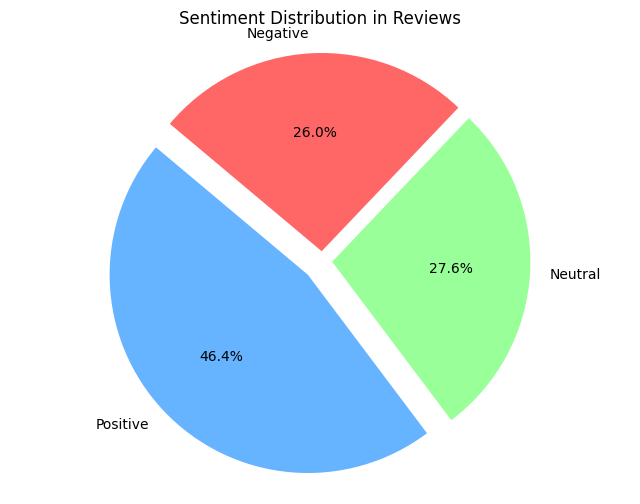

In [ ]:
import matplotlib.pyplot as plt

labels = ['Positive', 'Neutral', 'Negative']
sizes = [total_positive, total_neutral, total_negative]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
        colors=['#66b3ff', '#99ff99', '#ff6666'], startangle=140, explode=(0.1, 0.05, 0.05))
plt.title('Sentiment Distribution in Reviews')

plt.axis('equal')  # Ensures the pie is a perfect circle
plt.show()

In [9]:
df['GENRES'].nunique()

994

In [10]:
df['GENRES'] = df['GENRES'].fillna('')

In [11]:
df_copy = df.copy()

In [12]:
# Convertir les genres en une liste de genres uniques pour chaque film
df_copy['GENRES'] = df_copy['GENRES'].apply(lambda x: x.split('; '))

# Créer un dictionnaire pour compter la fréquence des genres
genre_counts = pd.Series([genre for sublist in df_copy['GENRES'] for genre in sublist]).value_counts()

# Créer une nouvelle colonne pour chaque genre, indiquant la fréquence d'apparition dans chaque film
for genre in genre_counts.index:
    df_copy[f'genre_{genre}'] = df_copy['GENRES'].apply(lambda x: x.count(genre))

# Vérifier le résultat
print(df_copy[['MOVIE_NAME', 'GENRES'] + [f'genre_{genre}' for genre in genre_counts.index]].head(2))


  MOVIE_NAME                      GENRES  genre_Drama  genre_Comedy  \
0   carry-on                  [Thriller]            0             0   
1  nosferatu  [Drama, Action, Adventure]            1             0   

   genre_Action  genre_Thriller  genre_Adventure  genre_Romance  genre_Horror  \
0             0               1                0              0             0   
1             1               0                1              0             0   

   genre_Crime  ...  genre_TV Movie  genre_Holiday  genre_Sci-Fi  \
0            0  ...               0              0             0   
1            0  ...               0              0             0   

   genre_Western  genre_Kids & Family  genre_Biography  genre_Musical  \
0              0                    0                0              0   
1              0                    0                0              0   

   genre_LGBTQ+  genre_Anime  genre_Sports  
0             0            0             0  
1             0            

In [13]:
genre_counts 

Drama                 1498
Comedy                1162
Action                 639
Thriller               592
Adventure              585
Romance                578
Horror                 451
Crime                  416
Fantasy                373
Science Fiction        340
Family                 337
Animation              310
Mystery                263
Mystery & Thriller     148
History                107
Music                  106
Documentary             95
                        80
War                     78
TV Movie                76
Holiday                 58
Sci-Fi                  56
Western                 42
Kids & Family           41
Biography               16
Musical                  9
LGBTQ+                   2
Anime                    2
Sports                   2
Name: count, dtype: int64

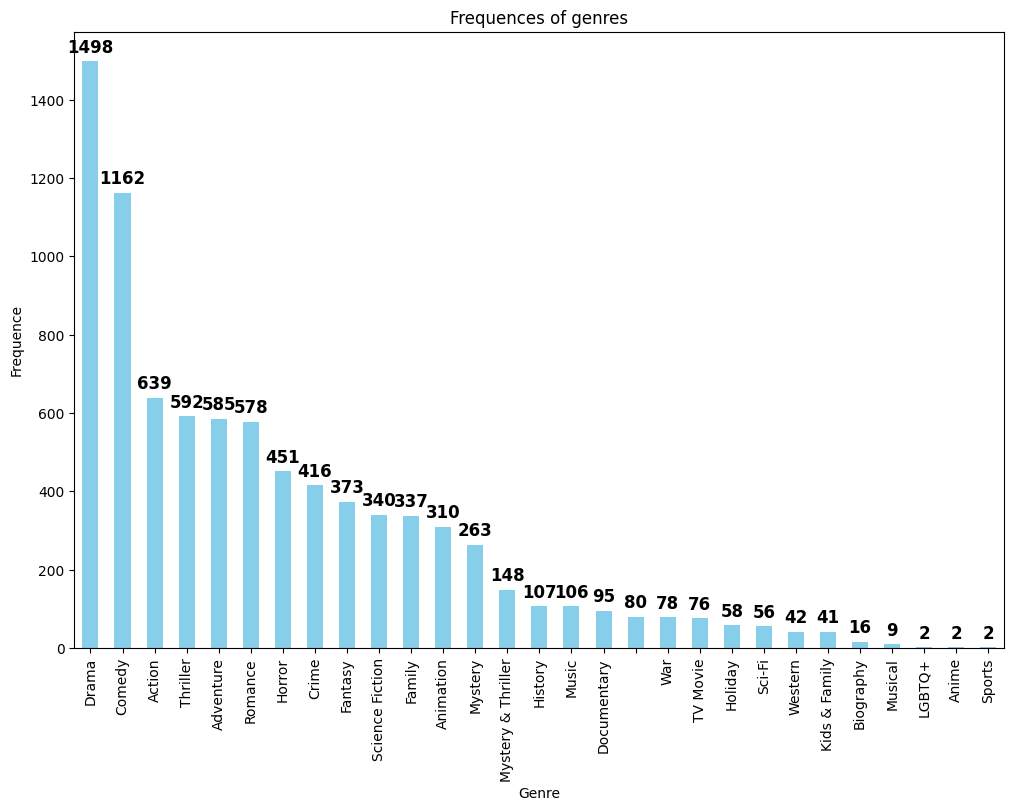

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
ax = genre_counts.plot(kind='bar', color='skyblue')

# Ajouter les annotations sur chaque barre
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # Texte affiché (la fréquence de la barre)
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position du texte
                ha='center', va='center',  # Alignement du texte
                fontsize=12, color='black', fontweight='bold',  # Style du texte
                xytext=(0, 10), textcoords='offset points')  # Décalage du texte pour éviter la superposition

plt.title('Frequences of genres')
plt.xlabel('Genre')
plt.ylabel('Frequence')
plt.xticks(rotation=90)
plt.show()


In [15]:
from itertools import combinations
from collections import Counter

# Créer une liste de toutes les combinaisons de genres possibles pour chaque film
all_combinations = [comb for sublist in df_copy['GENRES'] for comb in combinations(sorted(sublist), 2)]  # Combinons par paires

# Compter la fréquence des combinaisons de genres
combination_counts = Counter(all_combinations)


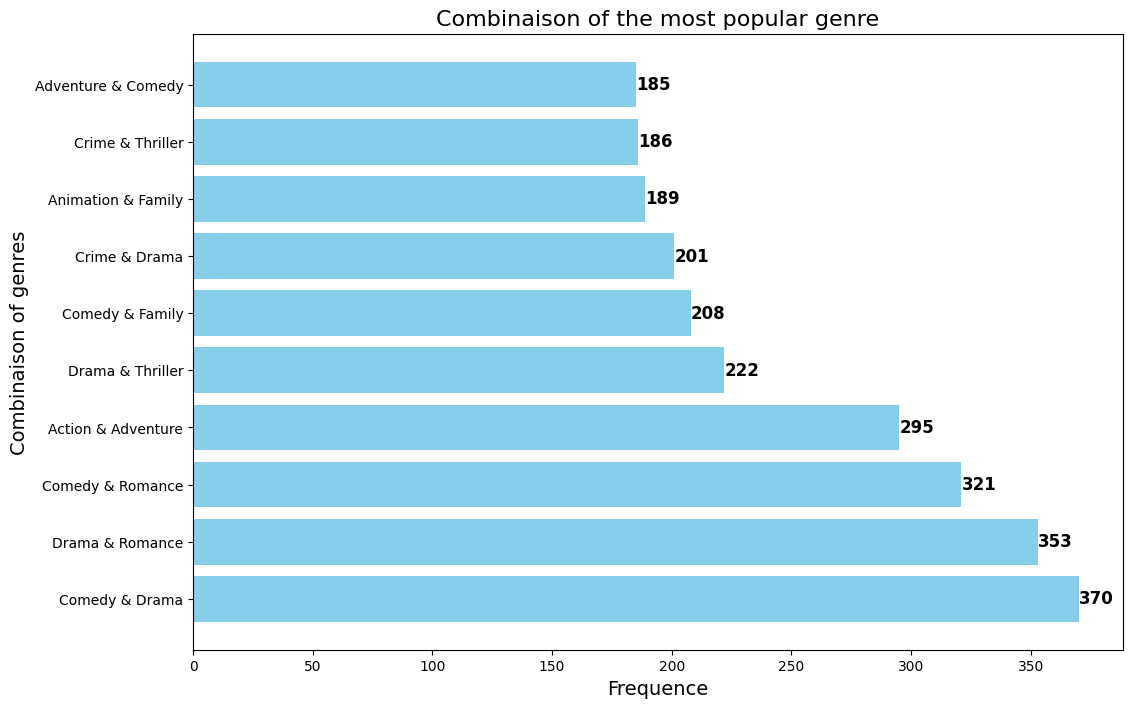

In [16]:
combination_labels, combination_frequencies = zip(*combination_counts.most_common(10))

# Convertir les tuples de combinaison en chaîne de caractères pour l'affichage
combination_labels = [' & '.join(comb) for comb in combination_labels]

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
plt.barh(combination_labels, combination_frequencies, color='skyblue')

# Ajouter des annotations avec la fréquence sur chaque barre
for index, value in enumerate(combination_frequencies):
    plt.text(value, index, str(value), va='center', fontsize=12, color='black', fontweight='bold')

# Titre et labels
plt.title('Combinaison of the most popular genre', fontsize=16)
plt.xlabel('Frequence', fontsize=14)
plt.ylabel('Combinaison of genres', fontsize=14)

# Afficher le graphique
plt.show()

In [33]:


# Calculer la moyenne de la durée des films bien notés
average_duration= df['DURATION_MIN'].mean()

print(f"La durée moyenne des films  est : {average_duration:.2f} minutes.")


La durée moyenne des films  est : 107.02 minutes.


In [17]:
# Définir la limite pour une "bonne note"
good_rating_threshold = 3

# Filtrer les films avec une note supérieure ou égale à la limite
well_rated_movies = df[df['RATING_SUR_5'] >good_rating_threshold]

# Calculer la moyenne de la durée des films bien notés
average_duration_well_rated = well_rated_movies['DURATION_MIN'].mean()

print(f"La durée moyenne des films bien notés (RATING_SUR_5>= {good_rating_threshold}) est : {average_duration_well_rated:.2f} minutes.")


La durée moyenne des films bien notés (RATING_SUR_5>= 3) est : 108.50 minutes.


In [35]:
# Diviser en deux groupes : bien notés et moins bien notés
poorly_rated_movies = df[df['RATING_SUR_5'] < 3]

# Moyennes des deux groupes
average_duration_poorly_rated = poorly_rated_movies['DURATION_MIN'].mean()

print(f"La durée moyenne des films moins bien notés (RATING < {3}) est : {average_duration_poorly_rated:.2f} minutes.")


La durée moyenne des films moins bien notés (RATING < 3) est : 101.67 minutes.


In [36]:
# Définir la limite pour une "mauvaise note"
bad_rating_threshold = 3

# Filtrer les films avec une note inférieure à cette limite
poorly_rated_movies = df[df['RATING_SUR_5'] < bad_rating_threshold]

# Compter le nombre de films mal notés
num_poorly_rated_movies = poorly_rated_movies.shape[0]

print(f"Le nombre de films mal notés (RATING < {bad_rating_threshold}) est : {num_poorly_rated_movies}")


Le nombre de films mal notés (RATING < 3) est : 1049


In [37]:
# Nombre total de films dans le dataset
total_movies = df.shape[0]

# Calculer le pourcentage de films mal notés
percentage_poorly_rated = (num_poorly_rated_movies / total_movies) * 100

print(f"Le nombre total de films est : {total_movies}")
print(f"Le pourcentage de films mal notés est : {percentage_poorly_rated:.2f}%")


Le nombre total de films est : 3535
Le pourcentage de films mal notés est : 29.67%


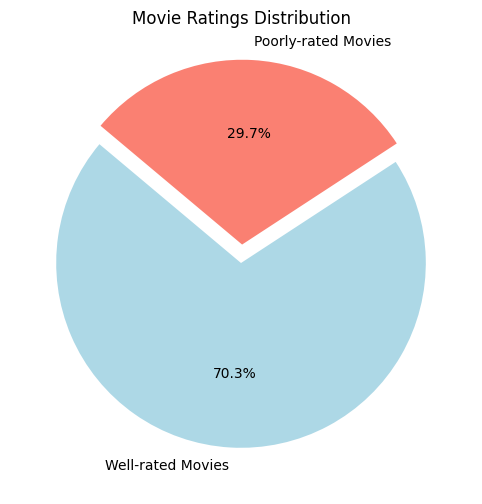

In [39]:
total_movies = df.shape[0]
percentage_poorly_rated = (num_poorly_rated_movies / total_movies) * 100

labels = ['Well-rated Movies', 'Poorly-rated Movies']
sizes = [total_movies - num_poorly_rated_movies, num_poorly_rated_movies]
colors = ['lightblue', 'salmon']
explode = (0, 0.1)  # Highlight the poorly-rated movies slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Movie Ratings Distribution')
plt.show()

In [21]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Télécharger les ressources nécessaires de NLTK
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Aycha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Télécharger les données nécessaires pour nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Définir les stopwords
stop_words = set(stopwords.words('english'))

# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Fonction pour enlever les emojis
def remove_emojis(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)  # Supprimer les caractères non-ASCII (emojis)

# Fonction de nettoyage des critiques
def clean_review(review):
    # Enlever les emojis
    review = remove_emojis(review)
    # Convertir en minuscule
    review = review.lower()
    # Supprimer les ponctuations
    review = re.sub(r'[^\w\s]', '', review)
    # Supprimer les espaces inutiles (espaces multiples)
    review = re.sub(r'\s+', ' ', review).strip()
    # Tokeniser la revue
    tokens = review.split()
    # Enlever les mots inutiles (stopwords) et appliquer la lemmatisation
    cleaned_review = ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words])
    return cleaned_review

# Assurer que la colonne REVIEWS contient des chaînes de caractères et traiter les valeurs NaN
df['REVIEWS'] = df['REVIEWS'].apply(lambda x: [clean_review(review) for review in x.split('**')] if isinstance(x, str) else [])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aycha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aycha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
df.to_csv(r"C:\Users\Aycha\Desktop\M2_BDIA\NLP\Projet_movie\final\dataset-final.csv", index=False)

In [24]:
def classify_reviews_nltk(reviews):
    sentiments = []
    for review in reviews:
        # Calculer les scores de sentiment
        scores = sia.polarity_scores(review.strip())
        if scores['compound'] > 0.1:
            sentiments.append('positive')   # Sentiment positif si compound > 0.1
        elif scores['compound'] >= 0 and scores['compound'] <= 0.1:
            sentiments.append('neutral')    # Sentiment neutre si compound entre 0 et 0.1
        else:
            sentiments.append('negative')   # Sentiment négatif si compound < 0

    return sentiments

In [25]:
df['MAJORITY_SENTIMENT'] = df['REVIEWS'].apply(classify_reviews_nltk)


In [26]:
df.head(2)

,Unnamed: 0,MOVIE_NAME,REVIEWS,SYNOPSIS,YEAR,CAST,DURATION_MIN,GENRES,PRODUCERS,RATING_SUR_5,MAJORITY_SENTIMENT,MOST_FREQUENT_SENTIMENT,Rating_Category,reviews_count
0,0,carry-on,[aucune critique disponible],A cul-de-sac in an oppressive suburb becomes a...,1998.0,"Julia Stiles, William R. Moses, Patrick Muldoo...",88.0,Thriller,Frank Beddor; Greg Steinberg,2.64,[neutral],neutral,Negative,1
1,1,nosferatu,[watched understand spongebob reference cannot...,Years after witnessing the death of the revere...,2024.0,"Paul Mescal, Denzel Washington, Pedro Pascal, ...",148.0,Drama; Action; Adventure,Michael A. Pruss; Winston Azzopardi; David Fra...,3.37,[positive],positive,Neutral,15


In [27]:
def most_frequent_word(sentiments):
    if not sentiments:  # Vérifier si la liste n'est pas vide
        return None
    # Compter les fréquences
    counts = Counter(sentiments)
    # Trouver le mot avec la fréquence maximale
    most_common = counts.most_common(1)
    return most_common[0][0] if most_common else None

# Appliquer la fonction à chaque ligne
df['MOST_FREQUENT_SENTIMENT'] = df['MAJORITY_SENTIMENT'].apply(most_frequent_word)


In [28]:
df.head()

,Unnamed: 0,MOVIE_NAME,REVIEWS,SYNOPSIS,YEAR,CAST,DURATION_MIN,GENRES,PRODUCERS,RATING_SUR_5,MAJORITY_SENTIMENT,MOST_FREQUENT_SENTIMENT,Rating_Category,reviews_count
0,0,carry-on,[aucune critique disponible],A cul-de-sac in an oppressive suburb becomes a...,1998.0,"Julia Stiles, William R. Moses, Patrick Muldoo...",88.0,Thriller,Frank Beddor; Greg Steinberg,2.64,[neutral],neutral,Negative,1
1,1,nosferatu,[watched understand spongebob reference cannot...,Years after witnessing the death of the revere...,2024.0,"Paul Mescal, Denzel Washington, Pedro Pascal, ...",148.0,Drama; Action; Adventure,Michael A. Pruss; Winston Azzopardi; David Fra...,3.37,[positive],positive,Neutral,15
2,2,home-alone,[young patrick bateman think wet bandit ever e...,After receiving an unexpected call from her wa...,2024.0,"Auliʻi Cravalho, Dwayne Johnson, Hualālai Chun...",100.0,Comedy; Animation; Adventure; Family,Christina Chen; Yvett Merino Flores,2.87,[positive],positive,Negative,13
3,3,the-holdovers,[handshake feel overwhelmingly warm emotional ...,A fading celebrity decides to use a black mark...,2024.0,"Demi Moore, Margaret Qualley, Dennis Quaid, Ed...",141.0,Horror; Science Fiction,Coralie Fargeat; Eric Fellner; Tim Bevan,3.85,[positive],positive,Positive,18
4,4,anora,[terrifying tale dating mama boy sean baker se...,After discovering their significant others are...,2024.0,"Lindsay Lohan, Ian Harding, Kristin Chenoweth,...",99.0,Drama; Romance; Comedy,Mike Elliott; Lisa Gooding,2.36,[positive],positive,Negative,17


C:\Users\Aycha\AppData\Local\Temp\ipykernel_35628\4046751500.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


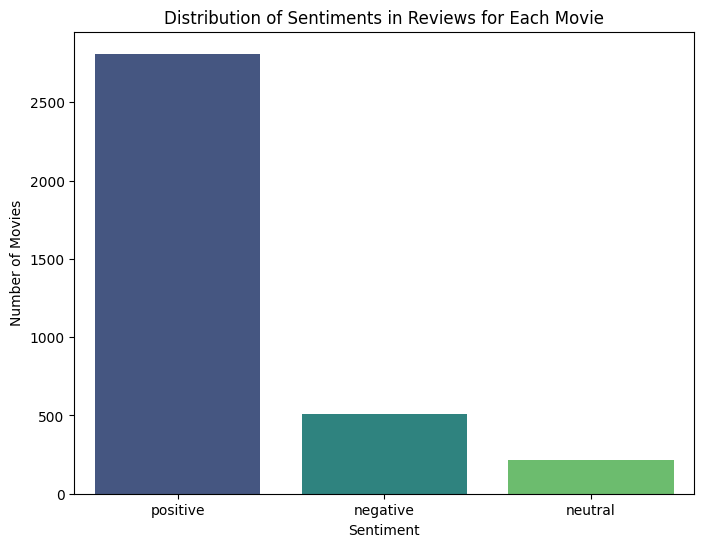

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = df['MOST_FREQUENT_SENTIMENT'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Ajouter des labels et un titre
plt.xlabel('Sentiment')
plt.ylabel('Number of Movies')
plt.title('Distribution of Sentiments in Reviews for Each Movie')
plt.show()

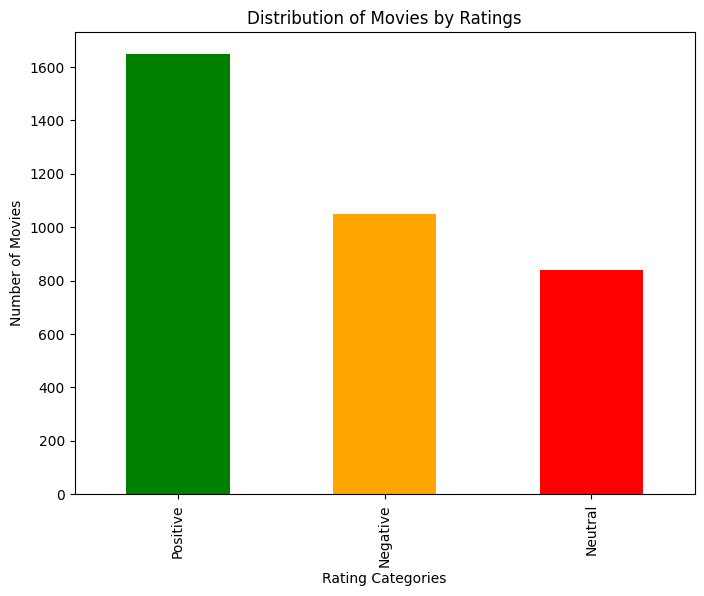

Distribution of Movies by Rating Category:
Rating_Category
Positive    1648
Negative    1049
Neutral      838
Name: count, dtype: int64


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Définir les seuils pour les notes
positive_threshold = 3.5
neutral_threshold = 3

# Classer les films en fonction de leur note
def classify_rating(rating):
    if rating >= positive_threshold:
        return 'Positive'
    elif rating >= neutral_threshold:
        return 'Neutral'
    else:
        return 'Negative'

# Appliquer la fonction pour classer chaque film
df['Rating_Category'] = df['RATING_SUR_5'].apply(classify_rating)

# Compter le nombre de films dans chaque catégorie
rating_counts = df['Rating_Category'].value_counts()

# Créer le graphique en barres
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color=['green', 'orange', 'red'])

plt.xlabel('Rating Categories')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Ratings')

# Display the chart
plt.show()

# Display category counts
print(f"Distribution of Movies by Rating Category:\n{rating_counts}")


In [31]:
df_copy=df.copy()

In [ ]:
# Convertir la colonne 'RATING_SUR_5' en valeurs numériques (en gérant les erreurs)
df_copy['RATING_SUR_5'] = pd.to_numeric(df_copy['RATING_SUR_5'], errors='coerce')

# Sélectionner les films ayant une note supérieure ou égale à 3,5
good_movies = df_copy[df_copy['RATING_SUR_5'] >= 3.5].copy()  # Utiliser .copy() pour éviter l'avertissement

# Filtrer les entrées non pertinentes dans la colonne 'CAST' ('Show All…', 'Indisponible', '')
good_movies['CAST'] = good_movies['CAST'].apply(lambda x: [actor for actor in x.split(', ') if actor not in ['Show All…', 'Indisponible', '']])

from collections import Counter

# Aplatir la liste des acteurs pour tous les films à haute note
all_casts = [actor for sublist in good_movies['CAST'] for actor in sublist]

# Compter la fréquence de chaque acteur
cast_counts = Counter(all_casts)

# Afficher les acteurs les plus populaires
popular_cast = cast_counts.most_common(10)  # Top 10 des acteurs les plus populaires
print(popular_cast)


In [37]:
popular_cast = cast_counts.most_common(15)  # Top 10 des acteurs les plus populaires
print(popular_cast)

[('Show All…', 930), ('Tom Cruise', 31), ('Samuel L. Jackson', 24), ('Mickie McGowan', 23), ('Ving Rhames', 22), ('Brad Pitt', 21), ('Jr.', 21), ('Sherry Lynn', 21), ('Robert De Niro', 20), ('Ralph Fiennes', 19), ('Jack Angel', 19), ('Simon Pegg', 19), ('Alec Baldwin', 18), ('Bess Flowers', 18), ('Bob Bergen', 18)]


In [33]:
df_copy

,MOVIE_NAME,REVIEWS,SYNOPSIS,YEAR,CAST,DURATION_MIN,GENRES,PRODUCERS,RATING_SUR_5
0,carry-on,Aucune critique disponible,A cul-de-sac in an oppressive suburb becomes a...,1998.0,"Julia Stiles, William R. Moses, Patrick Muldoo...",88.0,Thriller,Frank Beddor; Greg Steinberg,2.64
1,nosferatu,I only watched this to understand the Spongebo...,Years after witnessing the death of the revere...,2024.0,"Paul Mescal, Denzel Washington, Pedro Pascal, ...",148.0,Drama; Action; Adventure,Michael A. Pruss; Winston Azzopardi; David Fra...,3.37
2,home-alone,Young Patrick Bateman**do you think the wet ba...,After receiving an unexpected call from her wa...,2024.0,"Auliʻi Cravalho, Dwayne Johnson, Hualālai Chun...",100.0,Comedy; Animation; Adventure; Family,Christina Chen; Yvett Merino Flores,2.87
3,the-holdovers,There's a handshake in this that feels more ov...,A fading celebrity decides to use a black mark...,2024.0,"Demi Moore, Margaret Qualley, Dennis Quaid, Ed...",141.0,Horror; Science Fiction,Coralie Fargeat; Eric Fellner; Tim Bevan,3.85
4,anora,A terrifying tale of dating a mama’s boy**Sean...,After discovering their significant others are...,2024.0,"Lindsay Lohan, Ian Harding, Kristin Chenoweth,...",99.0,Drama; Romance; Comedy,Mike Elliott; Lisa Gooding,2.36
...,...,...,...,...,...,...,...,...,...
3530,18 to Party,"[('Tim Cogshell', 'I loved this angsty little ...","Teens grapple with a spate of recent suicides,...",2020,"Jeff Roda (Director), Alivia Clark (Amy), Tann...",80.0,Comedy,NaN,NaN
3531,1945,"[('Leslie Felperin', '[A] sombre, accomplished...",A village is forced to face up to its ill-gott...,2017,"Ferenc Török (Director), Péter Rudolf (Szentes...",91.0,Drama,NaN,NaN
3532,1985,[],When an adventurous teen discovers a secret ma...,2016,"Kang Vang (Director), Chang Yang (Billy aka Be...",114.0,Comedy; Drama; Adventure,NaN,NaN
3533,1992,[],Martin is 17 and spends all day recording ever...,30m,"Anthony Doncque (Director), Mathieu Dessertine...",NaN,Comedy; Drama,NaN,NaN


In [28]:
df.to_csv(r"C:\Users\Aycha\Desktop\M2_BDIA\NLP\Projet_movie\final\dataset-final.csv", index=False)